In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [3]:
# load data
df = pd.read_csv("profiles.csv")
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


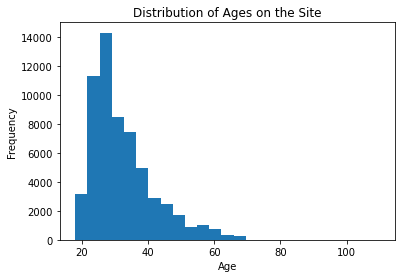

In [4]:
# Visualize some of the Data

# Get the distribution of ages
plt.hist(df.age, bins=25)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages on the Site")
plt.show()

In [5]:
# what are the value counts for zodiacs?
df.sign.value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

In [8]:
# grabbing required features

zodiac = df[["drinks", "drugs", "smokes", "essay0", "essay1", "essay2",
                "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", 
                "essay9", "sign"]]
zodiac.head()

,drinks,drugs,smokes,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sign
0,socially,never,sometimes,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,gemini
1,often,sometimes,no,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,cancer
2,socially,NaN,no,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",pisces but it doesn&rsquo;t matter
3,socially,NaN,no,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,pisces
4,socially,never,no,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,aquarius


In [12]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [15]:
# replace NaNs and transform data
zodiac["drinks"] = zodiac["drinks"].replace(np.nan, 'other', regex=True)
drink_mapping = {"other": 0, "not at all": 1, "rarely": 2, "socially": 3, 
                 "often": 4, "very often": 5, "desperately": 6}

zodiac["drinks_code"] = zodiac["drinks"].map(drink_mapping)


zodiac["smokes"] = zodiac["smokes"].replace(np.nan, 'other', regex=True)
smokes_mapping = {"other": 0, "sometimes": 1, "no": 2, "when drinking": 3,
                  "yes": 4, "trying to quit": 5}

zodiac["smokes_code"] = zodiac.smokes.map(smokes_mapping)


zodiac["drugs"] = zodiac["drugs"].replace(np.nan, 'other', regex=True)
drugs_mapping = {"other": 0, "never": 1, "sometimes": 2, "often": 3}

zodiac["drugs_code"] = zodiac.drugs.map(drugs_mapping)

In [20]:
# Transform essay columns
essay_cols = ["essay0","essay1","essay2","essay3","essay4",
              "essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = zodiac[essay_cols].replace(np.nan, '', regex=True)

# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

# Add sentence length  
zodiac["essay_len"] = all_essays.apply(lambda x: len(x))

# Add average word length 
zodiac["avg_word_length"] = all_essays.apply(lambda x: np.mean([len(w) for w in x.split()]))





# replace NaN values with mean val
zodiac["avg_word_length"] = zodiac["avg_word_length"].fillna(zodiac["avg_word_length"].mean())

In [23]:
# select features
features = zodiac[['smokes_code', 'drinks_code', 'drugs_code',
                             'essay_len', 'avg_word_length']]


# Normalize data
X = features.values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

features = pd.DataFrame(X_scaled, columns=features.columns)
features.dropna(inplace=True)


In [26]:
# map zodiacs to values
values = zodiac_df.sign.unique()
zodiac_sign_map = {sign: val for sign, val in zip(values, range(len(values)))}
zodiac["labels"] = zodiac["sign"].map(zodiac_sign_map)

In [27]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(features, zodiac["labels"],
                                                    test_size=0.20, random_state=0)

In [ ]:
# trian SVC model
classifier = SVC(kernel='rbf', gamma = 3, C = 1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=values))